In [1]:
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
root_path = '/Users/nguyenthaihuuhuy/Excercise/Pytorch Practice/data/flower_photos'

In [3]:
all_data = glob.glob(os.path.join(root_path, '*', '*.jpg'))
print(f"Dataset has {len(all_data)} for all classes")

Dataset has 3670 for all classes


In [4]:
from torchvision.datasets import ImageFolder

In [5]:
dataset = ImageFolder(root=root_path)
image_path, image_label = zip(*dataset.samples)

In [6]:
data_info = {}

for classes in glob.glob(os.path.join(root_path, '*')):
    class_name = os.path.basename(classes)
    samples = glob.glob(os.path.join(classes, '*'))
    data_info[class_name] = len(samples)

data_info

{'roses': 641,
 'sunflowers': 699,
 'daisy': 633,
 'dandelion': 898,
 'tulips': 799}

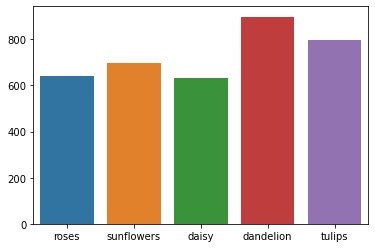

In [7]:
num_sample = [float(i) for i in data_info.values()]
sns.barplot(x=list(data_info.keys()), y=num_sample)
plt.show()

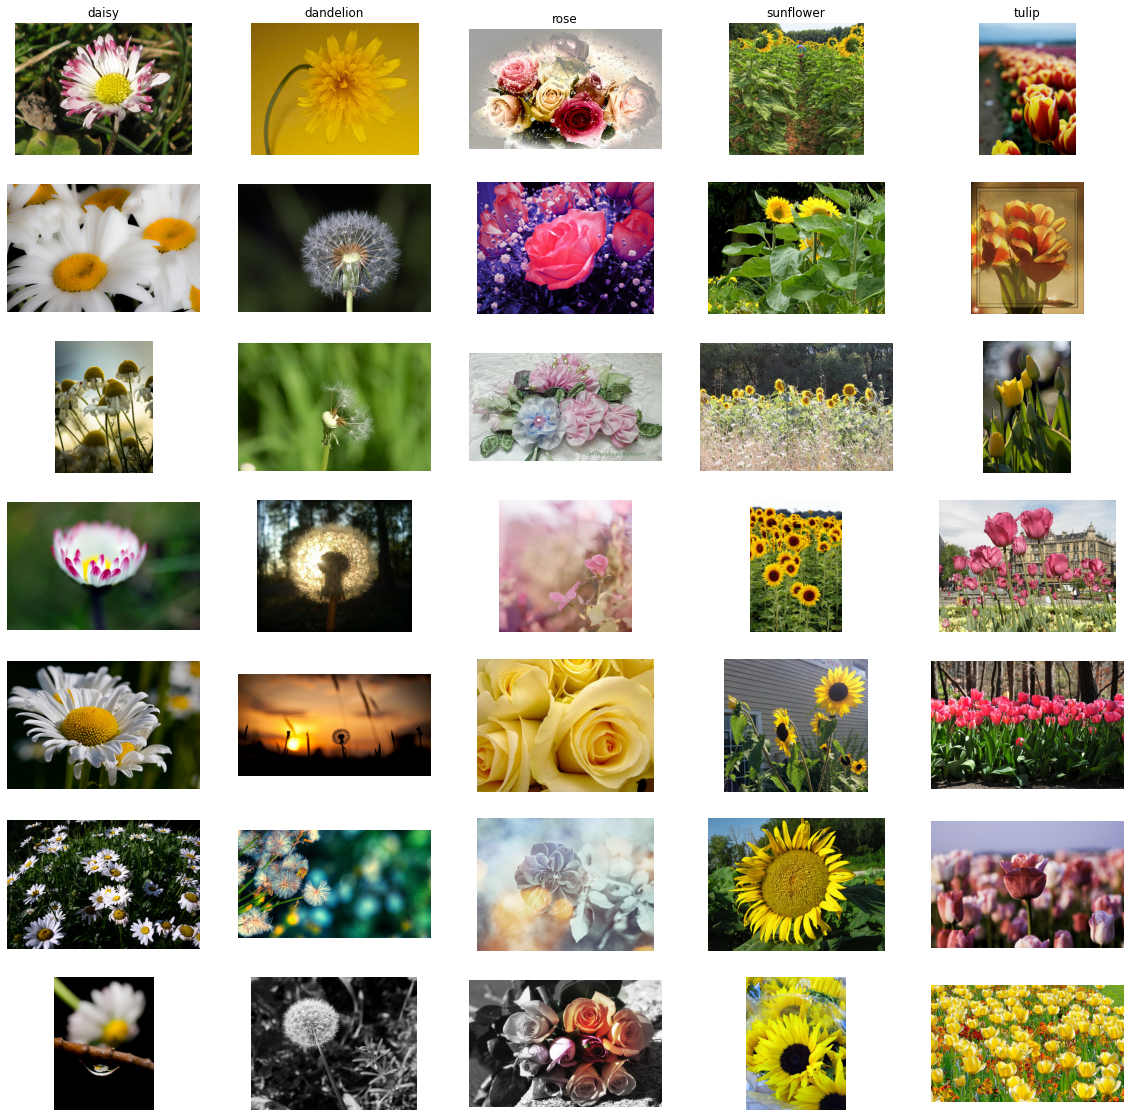

In [8]:
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
num_classes = len(classes)
samples_per_class = 7
plt.figure(figsize=(20, 20))
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.array(image_label) == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(dataset[idx][0])
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()